In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True,download=True, transform = transform)
testset = torchvision.datasets.CIFAR10(root = './data', train = False,download=True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainloader = DataLoader(trainset, batch_size=4, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=4, shuffle=False, num_workers=4)

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird  bird   cat   car


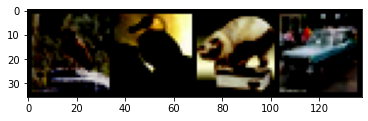

In [7]:
# get some random training images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16* 5* 5, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16* 5* 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

In [9]:
net = Net()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [11]:
trainset[0][0].shape

torch.Size([3, 32, 32])

In [19]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

tensor([[[[ 0.7882,  0.9373,  0.5373,  ...,  0.3882,  0.3098,  0.4275],
          [ 0.6706,  0.8588,  0.4902,  ...,  0.3725,  0.1529,  0.3647],
          [ 0.4902,  0.6000,  0.4039,  ...,  0.0667,  0.1137,  0.2157],
          ...,
          [-0.1059, -0.1216, -0.2078,  ..., -0.0667, -0.1608, -0.1608],
          [-0.1686, -0.1686, -0.1843,  ..., -0.0431, -0.0510, -0.0667],
          [-0.1922, -0.2157, -0.1294,  ..., -0.1059, -0.0510, -0.0667]],

         [[ 0.7961,  0.9373,  0.5843,  ...,  0.4196,  0.3490,  0.5216],
          [ 0.6627,  0.8510,  0.5216,  ...,  0.3961,  0.1922,  0.4667],
          [ 0.4667,  0.6000,  0.4039,  ...,  0.1686,  0.2392,  0.3725],
          ...,
          [-0.1373, -0.1608, -0.2392,  ..., -0.0980, -0.1922, -0.2078],
          [-0.1765, -0.1765, -0.1922,  ..., -0.0902, -0.1059, -0.1216],
          [-0.1922, -0.2235, -0.1686,  ..., -0.1686, -0.1059, -0.1294]],

         [[ 0.6941,  0.8353,  0.4588,  ...,  0.3490,  0.3020,  0.5294],
          [ 0.5294,  0.7490,  

tensor([2, 6, 7, 6])
tensor([[[[ 0.4980,  0.6471,  0.4039,  ...,  0.6863,  0.6863,  0.6941],
          [ 0.6157,  0.8353,  0.6784,  ...,  0.6078,  0.4980,  0.3569],
          [ 0.5137,  0.7255,  0.5765,  ...,  0.1451, -0.0353, -0.1765],
          ...,
          [-0.8118, -0.8275, -0.7882,  ..., -0.7333, -0.7412, -0.7647],
          [-0.7961, -0.7961, -0.7490,  ..., -0.7490, -0.7725, -0.7804],
          [-0.7490, -0.7569, -0.7333,  ..., -0.7961, -0.8196, -0.8275]],

         [[ 0.3412,  0.4667,  0.1843,  ...,  0.6000,  0.6078,  0.6314],
          [ 0.4588,  0.6706,  0.4824,  ...,  0.5686,  0.4431,  0.3020],
          [ 0.3725,  0.6000,  0.4196,  ...,  0.1451, -0.0510, -0.2078],
          ...,
          [-0.7412, -0.7569, -0.7176,  ..., -0.6863, -0.7020, -0.7255],
          [-0.7255, -0.7255, -0.6784,  ..., -0.7412, -0.7725, -0.7804],
          [-0.6941, -0.6941, -0.6784,  ..., -0.7725, -0.8039, -0.8118]],

         [[ 0.0039,  0.1216, -0.0745,  ...,  0.5922,  0.6392,  0.6706],
         

          [-0.5137, -0.5059, -0.4980,  ..., -0.4902, -0.5059, -0.5294]]]])
tensor([1, 4, 1, 0])
tensor([[[[ 0.6627,  0.3176,  0.0510,  ..., -0.5451, -0.5451, -0.5529],
          [ 1.0000,  0.8980,  0.6314,  ..., -0.5216, -0.5216, -0.5137],
          [ 0.9843,  0.9843,  0.9686,  ..., -0.6471, -0.6392, -0.6314],
          ...,
          [ 0.2000,  0.2157,  0.2471,  ..., -0.7882, -0.7725, -0.7333],
          [ 0.2000,  0.2235,  0.2157,  ..., -0.7647, -0.6471, -0.6392],
          [ 0.2392,  0.2314,  0.2314,  ..., -0.7020, -0.6471, -0.4824]],

         [[ 0.5765,  0.2235, -0.0510,  ..., -0.7490, -0.7569, -0.7647],
          [ 0.9608,  0.8510,  0.5765,  ..., -0.7020, -0.7020, -0.7020],
          [ 0.9373,  0.9373,  0.9216,  ..., -0.7725, -0.7725, -0.7569],
          ...,
          [-0.0745, -0.0510, -0.0196,  ..., -0.8588, -0.8431, -0.8039],
          [-0.0745, -0.0431, -0.0510,  ..., -0.8431, -0.7176, -0.7176],
          [-0.0353, -0.0431, -0.0353,  ..., -0.7804, -0.7255, -0.5608]],

      

tensor([1, 3, 6, 3])
tensor([[[[-0.6863, -0.6157, -0.6000,  ..., -0.2627,  0.5843,  0.6314],
          [-0.6863, -0.6863, -0.6627,  ..., -0.3882,  0.4902,  0.6392],
          [-0.6863, -0.7020, -0.7176,  ..., -0.6078, -0.1216,  0.2471],
          ...,
          [-0.0745, -0.0588, -0.0353,  ...,  0.1843,  0.1922,  0.1451],
          [-0.0039,  0.0039,  0.0275,  ...,  0.1373,  0.1059,  0.0902],
          [ 0.0196,  0.0118,  0.0039,  ...,  0.0667,  0.0510,  0.0588]],

         [[-0.4980, -0.4275, -0.4118,  ..., -0.1059,  0.7333,  0.7725],
          [-0.4980, -0.4980, -0.4745,  ..., -0.2235,  0.6471,  0.7961],
          [-0.4980, -0.5137, -0.5294,  ..., -0.4353,  0.0510,  0.4118],
          ...,
          [ 0.0667,  0.0824,  0.1059,  ...,  0.2471,  0.2471,  0.2157],
          [ 0.1373,  0.1451,  0.1686,  ...,  0.2235,  0.2235,  0.2157],
          [ 0.1608,  0.1529,  0.1373,  ...,  0.1765,  0.1922,  0.2078]],

         [[-0.7725, -0.7098, -0.6941,  ..., -0.0980,  0.7882,  0.8431],
         

          [-0.6314, -0.7333, -0.7098,  ..., -0.6157, -0.6392, -0.6471]]]])
tensor([6, 6, 3, 0])
tensor([[[[-0.0824, -0.2392, -0.0510,  ...,  0.2471,  0.1686,  0.2392],
          [ 0.1922,  0.0118,  0.0510,  ...,  0.0824,  0.1137,  0.2784],
          [ 0.2941,  0.1137,  0.3569,  ...,  0.0824,  0.1765,  0.2471],
          ...,
          [ 0.7412,  0.7569,  0.7255,  ...,  0.5922,  0.6314,  0.6863],
          [ 0.7961,  0.7490,  0.7020,  ...,  0.6549,  0.6863,  0.6863],
          [ 0.8196,  0.7804,  0.7490,  ...,  0.7020,  0.7255,  0.7569]],

         [[-0.2627, -0.4118, -0.2078,  ...,  0.0275, -0.0588,  0.0196],
          [ 0.0118, -0.1608, -0.0980,  ..., -0.0902, -0.0902,  0.0745],
          [ 0.1216, -0.0588,  0.2157,  ..., -0.0588, -0.0196,  0.0667],
          ...,
          [ 0.7098,  0.7255,  0.7020,  ...,  0.5373,  0.5765,  0.6706],
          [ 0.7804,  0.7333,  0.7020,  ...,  0.7020,  0.7255,  0.7569],
          [ 0.8510,  0.8039,  0.7804,  ...,  0.7490,  0.7882,  0.7882]],

      

tensor([7, 9, 1, 8])
tensor([[[[-0.5059, -0.5608, -0.6000,  ..., -0.6235, -0.5843, -0.6627],
          [-0.5843, -0.6078, -0.5451,  ..., -0.6549, -0.5608, -0.7412],
          [-0.6000, -0.5686, -0.6000,  ..., -0.5765, -0.5294, -0.7490],
          ...,
          [ 0.1059, -0.2471, -0.5216,  ..., -0.4118, -0.3333, -0.4745],
          [-0.0667, -0.4588, -0.6235,  ..., -0.1451,  0.0196, -0.2000],
          [-0.0824, -0.4824, -0.6941,  ...,  0.1608,  0.3255,  0.0431]],

         [[-0.3490, -0.3961, -0.5216,  ..., -0.4824, -0.3725, -0.5373],
          [-0.4275, -0.4667, -0.4588,  ..., -0.4745, -0.3569, -0.6627],
          [-0.4510, -0.4431, -0.5059,  ..., -0.3804, -0.3490, -0.7098],
          ...,
          [ 0.0902, -0.2706, -0.5059,  ..., -0.2392, -0.2157, -0.4196],
          [-0.1216, -0.4902, -0.5765,  ..., -0.0588,  0.0431, -0.2000],
          [-0.1451, -0.5529, -0.7020,  ...,  0.2157,  0.3176,  0.0118]],

         [[-0.4980, -0.5686, -0.6392,  ..., -0.7255, -0.6863, -0.7333],
         

          [ 0.2078,  0.2471,  0.5059,  ...,  0.6157,  0.5765,  0.5843]]]])
tensor([4, 1, 9, 0])
tensor([[[[-0.4275, -0.4902, -0.3098,  ..., -0.3961, -0.5137, -0.5059],
          [ 0.0667,  0.1843, -0.1686,  ...,  0.1373, -0.1843, -0.3961],
          [ 0.3098,  0.2392, -0.0745,  ..., -0.0196, -0.1216, -0.2706],
          ...,
          [-0.1843, -0.2078, -0.2627,  ..., -0.3490, -0.4353, -0.4118],
          [-0.1137, -0.2314, -0.2471,  ..., -0.2706, -0.3647, -0.4431],
          [-0.0980, -0.0902, -0.0118,  ..., -0.2000, -0.3647, -0.4667]],

         [[-0.3569, -0.4588, -0.3412,  ..., -0.3647, -0.4980, -0.4980],
          [ 0.0353,  0.1451, -0.2784,  ...,  0.0588, -0.2549, -0.4667],
          [ 0.2706,  0.2235, -0.1765,  ..., -0.1451, -0.2314, -0.3725],
          ...,
          [-0.1451, -0.1294, -0.1922,  ..., -0.4118, -0.4745, -0.4431],
          [-0.1451, -0.2392, -0.2627,  ..., -0.3647, -0.4039, -0.4745],
          [-0.1529, -0.1608, -0.0745,  ..., -0.2863, -0.4039, -0.4980]],

      

          [-0.4745, -0.4588, -0.4510,  ..., -0.3647, -0.3882, -0.3882]]]])
tensor([6, 7, 7, 1])
tensor([[[[ 0.0039,  0.1529,  0.1373,  ...,  0.1529,  0.1608,  0.1373],
          [-0.1529,  0.0353, -0.0431,  ...,  0.0196,  0.0588,  0.0275],
          [-0.0902,  0.0667,  0.1137,  ...,  0.0745,  0.0824,  0.0196],
          ...,
          [ 0.6157,  0.5922,  0.6157,  ...,  0.5686,  0.6000,  0.5843],
          [ 0.6235,  0.5843,  0.6235,  ...,  0.7569,  0.7725,  0.7882],
          [ 0.6314,  0.6000,  0.6235,  ...,  0.6784,  0.7020,  0.6706]],

         [[-0.0196,  0.1137,  0.1059,  ...,  0.1373,  0.0980,  0.1294],
          [-0.1059,  0.0745, -0.0039,  ...,  0.0824,  0.0824,  0.0902],
          [-0.1059,  0.0431,  0.0902,  ...,  0.0824,  0.0510,  0.0275],
          ...,
          [ 0.5451,  0.4824,  0.4902,  ...,  0.4902,  0.4824,  0.5137],
          [ 0.5529,  0.4824,  0.4980,  ...,  0.7412,  0.7176,  0.7725],
          [ 0.5294,  0.4588,  0.4667,  ...,  0.6471,  0.6235,  0.6314]],

      

tensor([6, 5, 6, 5])
tensor([[[[ 0.7647,  0.4039,  0.0588,  ...,  0.8196,  0.7961,  0.7882],
          [ 0.7725,  0.2627, -0.0667,  ...,  0.8667,  0.8667,  0.8039],
          [ 0.6471, -0.0510, -0.1529,  ...,  0.7255,  0.7176,  0.5843],
          ...,
          [ 0.0353,  0.0588, -0.1137,  ...,  0.1373,  0.2000,  0.1451],
          [-0.1529,  0.2941, -0.0275,  ...,  0.1765,  0.2235,  0.3804],
          [ 0.0039, -0.0431,  0.1216,  ...,  0.1059,  0.0510,  0.2549]],

         [[ 0.3412,  0.3961,  0.3412,  ...,  0.6706,  0.7020,  0.7333],
          [ 0.3569,  0.2784,  0.2235,  ...,  0.7804,  0.8196,  0.7333],
          [ 0.3961,  0.1843,  0.1137,  ...,  0.6157,  0.6863,  0.5765],
          ...,
          [-0.1686, -0.1294, -0.1686,  ...,  0.0118,  0.1686,  0.0275],
          [-0.1608,  0.0431, -0.1216,  ...,  0.0431,  0.1373,  0.2000],
          [-0.1451, -0.2471,  0.0039,  ..., -0.0745, -0.0353,  0.0667]],

         [[ 0.4275,  0.6471,  0.5765,  ...,  0.2627,  0.3176,  0.3569],
         

          [-0.7255, -0.7490, -0.6941,  ..., -0.2941, -0.8039, -0.7176]]]])
tensor([0, 8, 7, 5])
tensor([[[[-0.6863, -0.6941, -0.6706,  ..., -0.9608, -0.9608, -0.9686],
          [-0.6863, -0.7098, -0.6863,  ..., -0.9608, -0.9608, -0.9686],
          [-0.7020, -0.7176, -0.7176,  ..., -0.9608, -0.9608, -0.9608],
          ...,
          [-0.9765, -0.9765, -0.9765,  ...,  0.1608,  0.1451, -0.0039],
          [-0.9922, -0.9922, -0.9922,  ...,  0.0980,  0.1137,  0.0039],
          [-0.9922, -0.9922, -0.9922,  ...,  0.1294,  0.1451,  0.0431]],

         [[-0.7412, -0.7490, -0.7255,  ..., -0.9765, -0.9765, -0.9843],
          [-0.7412, -0.7647, -0.7412,  ..., -0.9765, -0.9765, -0.9765],
          [-0.7490, -0.7725, -0.7725,  ..., -0.9765, -0.9765, -0.9765],
          ...,
          [-0.9922, -0.9922, -0.9922,  ...,  0.1451,  0.1451,  0.0118],
          [-0.9922, -0.9922, -0.9922,  ...,  0.1216,  0.1529,  0.0431],
          [-0.9922, -0.9922, -0.9922,  ...,  0.1529,  0.1843,  0.0902]],

      

          [-0.2706, -0.2706, -0.2627,  ..., -0.0980, -0.0902, -0.0824]]]])
tensor([9, 5, 2, 0])
tensor([[[[-0.2706, -0.3020, -0.3569,  ..., -0.3490, -0.3647, -0.4588],
          [-0.3569, -0.3647, -0.4431,  ..., -0.4039, -0.4980, -0.6706],
          [-0.4353, -0.4510, -0.6471,  ..., -0.4980, -0.7333, -0.8824],
          ...,
          [-0.4667, -0.4745, -0.4667,  ..., -0.5451, -0.6000, -0.6549],
          [-0.4510, -0.4431, -0.4275,  ..., -0.5451, -0.5843, -0.6471],
          [-0.4588, -0.4431, -0.3961,  ..., -0.5529, -0.5843, -0.6314]],

         [[-0.8431, -0.8275, -0.8431,  ..., -0.7412, -0.5843, -0.5843],
          [-0.8510, -0.8431, -0.8353,  ..., -0.7569, -0.6784, -0.7725],
          [-0.8588, -0.8510, -0.8510,  ..., -0.8275, -0.9059, -0.9608],
          ...,
          [-0.6000, -0.6392, -0.6471,  ..., -0.5608, -0.6078, -0.6549],
          [-0.6549, -0.6392, -0.6314,  ..., -0.5608, -0.5922, -0.6471],
          [-0.6549, -0.6392, -0.6235,  ..., -0.5608, -0.5922, -0.6314]],

      

          [-0.0118,  0.0902,  0.1843,  ...,  0.0353, -0.0196, -0.0353]]]])
tensor([0, 7, 3, 4])
tensor([[[[ 0.2784,  0.0824, -0.3098,  ..., -0.8353, -0.8588, -0.9294],
          [ 0.6784,  0.2941, -0.2706,  ..., -0.8275, -0.8510, -0.9294],
          [ 0.9216,  0.4353, -0.2235,  ..., -0.8275, -0.8510, -0.9216],
          ...,
          [-0.1529, -0.3569, -0.7020,  ..., -0.0118,  0.0980,  0.1922],
          [-0.1765, -0.2784, -0.3961,  ..., -0.3255, -0.2784, -0.2235],
          [-0.1843, -0.2078, -0.2157,  ..., -0.3020, -0.3020, -0.2941]],

         [[-0.1765, -0.4039, -0.6549,  ..., -0.8353, -0.8667, -0.9373],
          [ 0.3176, -0.1294, -0.5843,  ..., -0.8275, -0.8588, -0.9373],
          [ 0.6000,  0.0039, -0.5686,  ..., -0.8196, -0.8588, -0.9294],
          ...,
          [-0.2000, -0.3882, -0.7255,  ..., -0.0980,  0.0118,  0.1059],
          [-0.2078, -0.3176, -0.4353,  ..., -0.3725, -0.3333, -0.2784],
          [-0.2157, -0.2471, -0.2549,  ..., -0.3490, -0.3490, -0.3412]],

      

tensor([5, 9, 0, 3])
tensor([[[[ 0.3882,  0.1765,  0.2000,  ...,  0.1922,  0.1922,  0.3725],
          [-0.1843, -0.5294, -0.5059,  ..., -0.5686, -0.5529, -0.1137],
          [-0.2078, -0.3882, -0.2863,  ..., -0.4275, -0.3255,  0.0667],
          ...,
          [ 0.1608,  0.4667,  0.6471,  ...,  0.4275,  0.3490,  0.3569],
          [ 0.1686,  0.3961,  0.5294,  ...,  0.3725,  0.3569,  0.4039],
          [ 0.5216,  0.5216,  0.5843,  ...,  0.5137,  0.5137,  0.5922]],

         [[ 0.3961,  0.2314,  0.2627,  ...,  0.2235,  0.2000,  0.3961],
          [-0.1294, -0.3882, -0.3255,  ..., -0.4196, -0.4667, -0.0588],
          [-0.1216, -0.1686, -0.0275,  ..., -0.1922, -0.1686,  0.1451],
          ...,
          [ 0.0275,  0.2627,  0.4275,  ...,  0.2549,  0.2000,  0.2784],
          [ 0.0588,  0.2235,  0.3333,  ...,  0.2157,  0.2314,  0.3176],
          [ 0.4510,  0.4431,  0.4980,  ...,  0.4353,  0.4431,  0.5294]],

         [[ 0.3020,  0.1373,  0.1373,  ...,  0.1059,  0.1451,  0.2863],
         

tensor([[[[ 0.1451,  0.2078,  0.3333,  ..., -0.0039, -0.0275, -0.1059],
          [ 0.1216,  0.1843,  0.3020,  ...,  0.0118, -0.0039, -0.0824],
          [ 0.1608,  0.2078,  0.2078,  ...,  0.1451,  0.1137,  0.0118],
          ...,
          [ 0.0980,  0.1451,  0.1451,  ...,  0.1059,  0.0980,  0.0196],
          [-0.0196,  0.0196,  0.0039,  ...,  0.0824,  0.0824,  0.0353],
          [-0.2314, -0.2157, -0.1765,  ...,  0.0510,  0.0353, -0.0667]],

         [[-0.2078, -0.1922, -0.0980,  ..., -0.3098, -0.3333, -0.3882],
          [-0.2392, -0.2078, -0.1059,  ..., -0.2941, -0.3020, -0.3569],
          [-0.2314, -0.2078, -0.1843,  ..., -0.2235, -0.2471, -0.3176],
          ...,
          [-0.1137, -0.0902, -0.0980,  ...,  0.1843,  0.1765,  0.0902],
          [-0.0431, -0.0196, -0.0275,  ...,  0.2000,  0.1922,  0.1294],
          [-0.1451, -0.1373, -0.1137,  ...,  0.1216,  0.1059,  0.0039]],

         [[-0.3490, -0.3569, -0.2627,  ..., -0.4667, -0.4824, -0.5216],
          [-0.3725, -0.3804, -

tensor([0, 8, 7, 6])
tensor([[[[ 1.0000,  0.9451,  0.8431,  ...,  0.9137,  0.9373,  0.9922],
          [ 0.9686,  0.7804,  0.6706,  ...,  0.7569,  0.7961,  0.9216],
          [ 0.8824,  0.6941,  0.6549,  ...,  0.7176,  0.7412,  0.8588],
          ...,
          [ 1.0000,  0.9765,  0.9529,  ...,  0.9765,  0.9686,  0.9843],
          [ 1.0000,  0.9765,  0.9686,  ...,  0.9843,  0.9843,  0.9922],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  0.9373,  0.8353,  ...,  0.9137,  0.9451,  1.0000],
          [ 0.9608,  0.7647,  0.6392,  ...,  0.7412,  0.7961,  0.9216],
          [ 0.8745,  0.6706,  0.6157,  ...,  0.6941,  0.7333,  0.8588],
          ...,
          [ 1.0000,  0.9765,  0.9451,  ...,  0.9843,  0.9843,  0.9922],
          [ 1.0000,  0.9843,  0.9686,  ...,  0.9922,  0.9922,  0.9922],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  0.9765,  0.9137,  ...,  0.9843,  0.9765,  0.9843],
         

          [-0.8667, -0.9294, -0.8902,  ..., -0.8118, -0.8039, -0.8510]]]])
tensor([3, 8, 3, 7])
tensor([[[[-0.5843, -0.6471, -0.6706,  ..., -0.5843, -0.5922, -0.6078],
          [-0.5686, -0.6235, -0.6471,  ..., -0.4510, -0.3647, -0.3961],
          [-0.5765, -0.6471, -0.6549,  ..., -0.3804, -0.2863, -0.3255],
          ...,
          [-0.0667, -0.0667, -0.0510,  ..., -0.6314, -0.6314, -0.6078],
          [-0.1294, -0.0980, -0.0275,  ..., -0.5608, -0.5608, -0.5451],
          [-0.2941, -0.2157, -0.1765,  ..., -0.5451, -0.5059, -0.4824]],

         [[-0.7176, -0.7412, -0.7490,  ..., -0.6078, -0.6078, -0.6235],
          [-0.6706, -0.6863, -0.6941,  ..., -0.5137, -0.4431, -0.4588],
          [-0.6392, -0.6706, -0.6706,  ..., -0.4902, -0.3961, -0.4196],
          ...,
          [-0.3804, -0.3804, -0.3725,  ..., -0.7176, -0.7255, -0.6941],
          [-0.4510, -0.4275, -0.3804,  ..., -0.6941, -0.6941, -0.6941],
          [-0.5059, -0.4510, -0.4196,  ..., -0.6706, -0.6392, -0.6471]],

      

tensor([[[[-0.7020, -0.6627,  0.0980,  ...,  0.2549,  0.1059,  0.0510],
          [-0.7333, -0.6941, -0.0431,  ...,  0.2157, -0.0353,  0.0510],
          [-0.6706, -0.6235, -0.1137,  ...,  0.1529, -0.0588,  0.0353],
          ...,
          [-0.6627, -0.6863, -0.7490,  ..., -0.0510,  0.0039,  0.3098],
          [-0.7412, -0.7412, -0.7725,  ..., -0.2549, -0.0745,  0.2392],
          [-0.5843, -0.6000, -0.5922,  ..., -0.4196, -0.2863, -0.1059]],

         [[-0.7176, -0.7176,  0.0118,  ...,  0.1686,  0.0039, -0.0824],
          [-0.7412, -0.7490, -0.0902,  ...,  0.1373, -0.1373, -0.0510],
          [-0.6706, -0.6706, -0.1686,  ...,  0.0745, -0.1608, -0.0510],
          ...,
          [-0.4275, -0.4353, -0.4824,  ...,  0.0196,  0.0667,  0.3569],
          [-0.4980, -0.4902, -0.5059,  ..., -0.1529,  0.0118,  0.3098],
          [-0.3882, -0.3804, -0.3725,  ..., -0.2863, -0.1608,  0.0118]],

         [[-0.6706, -0.7098, -0.0275,  ...,  0.1608,  0.0118, -0.1451],
          [-0.6627, -0.7020, -

          [ 1.0000,  0.9922,  1.0000,  ...,  0.4588,  0.4824,  0.4196]]]])
tensor([5, 6, 7, 3])
tensor([[[[-0.3255, -0.3647, -0.4353,  ...,  0.7020,  0.8275,  0.7569],
          [-0.3490, -0.4039, -0.5059,  ...,  0.6000,  0.7804,  0.7569],
          [-0.3804, -0.4353, -0.5216,  ...,  0.6000,  0.6627,  0.6314],
          ...,
          [-0.1373, -0.1216, -0.1216,  ..., -0.3412, -0.3961, -0.1608],
          [-0.2706, -0.2706, -0.2471,  ..., -0.6706, -0.7020, -0.5608],
          [-0.3804, -0.3725, -0.3412,  ..., -0.8431, -0.8196, -0.7804]],

         [[-0.2784, -0.3255, -0.3961,  ...,  0.7961,  0.8745,  0.8275],
          [-0.3020, -0.3647, -0.4667,  ...,  0.6863,  0.8353,  0.8353],
          [-0.3333, -0.3961, -0.4902,  ...,  0.6784,  0.7255,  0.7176],
          ...,
          [-0.1608, -0.1608, -0.1686,  ..., -0.2941, -0.3804, -0.1843],
          [-0.2784, -0.2863, -0.2863,  ..., -0.6549, -0.7020, -0.5843],
          [-0.3804, -0.3882, -0.3725,  ..., -0.8588, -0.8275, -0.8118]],

      

          [-0.5529, -0.5686, -0.5686,  ..., -0.3569, -0.3490, -0.3412]]]])
tensor([5, 1, 7, 4])
tensor([[[[-0.4745, -0.3020, -0.2784,  ..., -0.6549, -0.5137, -0.4275],
          [-0.5843, -0.3804, -0.3255,  ..., -0.5843, -0.4353, -0.3490],
          [-0.7647, -0.5922, -0.5686,  ..., -0.4902, -0.3725, -0.2784],
          ...,
          [-0.7333, -0.7961, -0.7725,  ..., -0.1216, -0.1686,  0.3725],
          [-0.8275, -0.8275, -0.7725,  ..., -0.1765, -0.2941,  0.1373],
          [-0.8667, -0.8353, -0.8118,  ..., -0.2784, -0.3176, -0.0196]],

         [[-0.3255, -0.1529, -0.1529,  ..., -0.5451, -0.4039, -0.3176],
          [-0.4353, -0.2235, -0.2078,  ..., -0.4745, -0.3098, -0.2235],
          [-0.6235, -0.4510, -0.4431,  ..., -0.3961, -0.2471, -0.1529],
          ...,
          [-0.5765, -0.6549, -0.6471,  ..., -0.0745, -0.1373,  0.3255],
          [-0.6784, -0.6863, -0.6471,  ..., -0.0824, -0.2000,  0.1922],
          [-0.7412, -0.7176, -0.7020,  ..., -0.1686, -0.2078,  0.0353]],

      

tensor([9, 0, 1, 3])
tensor([[[[-0.0902, -0.1294,  0.0902,  ...,  0.3412,  0.1373,  0.2392],
          [ 0.1137,  0.0824,  0.0745,  ...,  0.3804,  0.1843,  0.2549],
          [ 0.0353,  0.1059,  0.0353,  ...,  0.2078,  0.0745,  0.2392],
          ...,
          [ 0.3569,  0.3333,  0.3725,  ...,  0.6000,  0.5765,  0.4667],
          [ 0.3255,  0.3569,  0.3804,  ...,  0.4824,  0.5686,  0.5137],
          [ 0.2941,  0.3255,  0.3098,  ...,  0.3333,  0.4118,  0.4118]],

         [[ 0.0039, -0.0510,  0.1529,  ...,  0.4118,  0.2471,  0.3490],
          [ 0.1686,  0.1451,  0.1451,  ...,  0.4667,  0.2941,  0.3490],
          [ 0.1059,  0.1686,  0.1059,  ...,  0.3176,  0.2157,  0.3647],
          ...,
          [ 0.6314,  0.6157,  0.6471,  ...,  0.6784,  0.6471,  0.6392],
          [ 0.6471,  0.6549,  0.6784,  ...,  0.5922,  0.6000,  0.5765],
          [ 0.5922,  0.6078,  0.6078,  ...,  0.3882,  0.4275,  0.3412]],

         [[ 0.0275, -0.0510,  0.1294,  ...,  0.5608,  0.4039,  0.4902],
         

          [ 0.1922, -0.3569,  0.0431,  ...,  0.8275,  0.7725,  0.8039]]]])
tensor([8, 7, 3, 7])
tensor([[[[ 0.9922,  1.0000,  1.0000,  ...,  0.3333,  0.0039, -0.0667],
          [ 0.9765,  0.9765,  0.9843,  ...,  0.1765, -0.0588, -0.1451],
          [ 0.9765,  0.9765,  0.9843,  ...,  0.1216,  0.0039, -0.0588],
          ...,
          [ 0.7020,  0.7647,  0.8588,  ...,  0.8275,  0.8824,  0.5686],
          [ 0.7882,  0.6314,  0.1608,  ...,  0.8667,  0.8745,  0.8275],
          [ 0.3804, -0.2157, -0.5294,  ...,  0.7882,  0.8588,  0.8824]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.2157, -0.0980, -0.1451],
          [ 0.9765,  0.9686,  0.9765,  ..., -0.0196, -0.2706, -0.3176],
          [ 0.9843,  0.9765,  0.9843,  ..., -0.1529, -0.3098, -0.3255],
          ...,
          [ 0.5294,  0.4902,  0.6471,  ...,  0.5451,  0.6157,  0.3412],
          [ 0.6078,  0.3882,  0.0118,  ...,  0.5765,  0.5843,  0.5843],
          [ 0.2392, -0.3804, -0.6000,  ...,  0.4980,  0.5922,  0.6549]],

      

tensor([2, 1, 6, 5])
tensor([[[[ 0.1686,  0.0510, -0.1843,  ...,  0.9765,  0.9765,  0.9843],
          [ 0.0039,  0.0118, -0.1922,  ...,  0.9765,  0.9765,  0.9843],
          [-0.0196, -0.1608, -0.2392,  ...,  0.9922,  0.9765,  0.9843],
          ...,
          [-0.6000, -0.5843, -0.6078,  ..., -0.4667, -0.4353, -0.4667],
          [-0.5843, -0.5843, -0.6392,  ..., -0.5529, -0.4980, -0.4902],
          [-0.6627, -0.6784, -0.7020,  ..., -0.5294, -0.4667, -0.4118]],

         [[ 0.2627,  0.1137, -0.0118,  ...,  0.9843,  0.9843,  0.9843],
          [ 0.0588,  0.0510, -0.0745,  ...,  0.9922,  0.9922,  0.9922],
          [ 0.0588, -0.0824, -0.1216,  ...,  1.0000,  0.9922,  0.9922],
          ...,
          [-0.3412, -0.3333, -0.3569,  ..., -0.2471, -0.2157, -0.2471],
          [-0.3333, -0.3333, -0.3882,  ..., -0.3333, -0.2784, -0.2706],
          [-0.4039, -0.4275, -0.4510,  ..., -0.3098, -0.2471, -0.1922]],

         [[ 0.3176,  0.2000,  0.0588,  ...,  0.9294,  0.9373,  0.9608],
         

tensor([[[[-0.3255, -0.3647, -0.3098,  ...,  0.0667,  0.1529,  0.1843],
          [-0.5059, -0.4902, -0.4588,  ...,  0.1137,  0.1765,  0.1922],
          [-0.5137, -0.5529, -0.5216,  ...,  0.1529,  0.1451,  0.1765],
          ...,
          [-0.0588, -0.0196, -0.0353,  ...,  0.0510,  0.0196, -0.0275],
          [-0.0039, -0.0275, -0.0588,  ...,  0.0039,  0.0353,  0.0275],
          [-0.0588, -0.1137, -0.1216,  ..., -0.0980, -0.0431, -0.0275]],

         [[-0.1294, -0.1373, -0.0980,  ...,  0.0902,  0.1922,  0.2471],
          [-0.2784, -0.2235, -0.2078,  ...,  0.1765,  0.2392,  0.2627],
          [-0.2863, -0.2863, -0.2784,  ...,  0.2471,  0.2314,  0.2471],
          ...,
          [-0.0196, -0.0039, -0.0275,  ...,  0.0667,  0.0588,  0.0275],
          [ 0.0353, -0.0039, -0.0510,  ..., -0.0510,  0.0039,  0.0118],
          [-0.0275, -0.0902, -0.1216,  ..., -0.1843, -0.1216, -0.0824]],

         [[-0.0275, -0.0431,  0.0039,  ...,  0.1137,  0.2235,  0.2941],
          [-0.1843, -0.1451, -

tensor([0, 9, 6, 6])
tensor([[[[-0.1608, -0.1137,  0.0353,  ..., -0.4667,  0.3725,  0.1922],
          [-0.2549, -0.1608, -0.0275,  ..., -0.4980,  0.1059, -0.0039],
          [-0.1451, -0.1137, -0.0667,  ..., -0.5059, -0.0902, -0.1529],
          ...,
          [-0.0980, -0.1137, -0.0745,  ...,  0.1686,  0.0275, -0.0510],
          [ 0.0196, -0.0196, -0.0980,  ..., -0.0667, -0.1451, -0.1373],
          [-0.0196, -0.0588, -0.1059,  ..., -0.0824, -0.0431, -0.1137]],

         [[ 0.0039, -0.0039,  0.1059,  ..., -0.5216,  0.3176,  0.1765],
          [-0.0431,  0.0196,  0.1216,  ..., -0.4902,  0.1608,  0.1059],
          [ 0.0824,  0.1059,  0.1451,  ..., -0.4431,  0.0588,  0.0588],
          ...,
          [ 0.0275,  0.0196,  0.0588,  ...,  0.1529,  0.0275, -0.0275],
          [ 0.0902,  0.0745,  0.0118,  ..., -0.1059, -0.1843, -0.1529],
          [ 0.0745,  0.0745,  0.0667,  ..., -0.1137, -0.0667, -0.1137]],

         [[-0.4667, -0.4510, -0.3255,  ..., -0.6627,  0.0431, -0.1216],
         

          [-0.4275, -0.3725, -0.3882,  ..., -0.2314, -0.1451, -0.1686]]]])
tensor([3, 7, 6, 5])
tensor([[[[ 0.8667,  0.8824,  0.8824,  ...,  0.9373,  0.9373,  0.9373],
          [ 0.8275,  0.8431,  0.8510,  ...,  0.8667,  0.8667,  0.8745],
          [ 0.7647,  0.7804,  0.7882,  ...,  0.8275,  0.8353,  0.8510],
          ...,
          [ 0.3333,  0.3412,  0.3412,  ...,  0.3176,  0.3647,  0.3725],
          [ 0.3255,  0.3569,  0.3647,  ...,  0.4039,  0.4039,  0.4039],
          [ 0.3882,  0.4196,  0.4275,  ...,  0.4667,  0.4667,  0.4510]],

         [[ 0.9843,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9059,  0.9216,  0.9294,  ...,  0.9765,  0.9765,  0.9843],
          [ 0.8824,  0.8980,  0.9137,  ...,  0.9608,  0.9608,  0.9765],
          ...,
          [ 0.0980,  0.0980,  0.0980,  ...,  0.0824,  0.1294,  0.1294],
          [ 0.0824,  0.1059,  0.1216,  ...,  0.1529,  0.1608,  0.1608],
          [ 0.1373,  0.1608,  0.1686,  ...,  0.2078,  0.2078,  0.1922]],

      

tensor([3, 9, 9, 2])
tensor([[[[ 0.7882,  0.8353,  0.8902,  ...,  0.1922,  0.0824,  0.0039],
          [ 0.8039,  0.8510,  0.8980,  ...,  0.0980, -0.0667, -0.1294],
          [ 0.8118,  0.8588,  0.9059,  ...,  0.0510, -0.1765, -0.2235],
          ...,
          [ 0.9373,  0.9373,  0.9373,  ..., -0.8275, -0.8824, -0.8745],
          [ 0.9451,  0.9373,  0.9373,  ..., -0.8431, -0.8510, -0.8431],
          [ 0.9529,  0.9373,  0.9373,  ..., -0.8275, -0.8510, -0.8275]],

         [[ 0.8275,  0.8667,  0.9059,  ..., -0.0824, -0.1373, -0.2000],
          [ 0.8431,  0.8824,  0.9137,  ..., -0.1608, -0.2471, -0.2941],
          [ 0.8510,  0.8902,  0.9216,  ..., -0.1686, -0.3255, -0.3647],
          ...,
          [ 0.9373,  0.9373,  0.9373,  ..., -0.9059, -0.9608, -0.9608],
          [ 0.9451,  0.9373,  0.9373,  ..., -0.9216, -0.9294, -0.9216],
          [ 0.9529,  0.9373,  0.9373,  ..., -0.9059, -0.9294, -0.9059]],

         [[ 0.8118,  0.8588,  0.8980,  ..., -0.3569, -0.3882, -0.4118],
         

          [ 1.0000,  0.9686,  0.9686,  ...,  0.9843,  0.9765,  0.9765]]]])
tensor([0, 9, 5, 3])
tensor([[[[-0.2549, -0.4510, -0.0980,  ..., -0.0039, -0.0588, -0.2941],
          [-0.4824, -0.4510, -0.0667,  ..., -0.1373, -0.4039, -0.1843],
          [-0.5137, -0.4275,  0.0275,  ..., -0.1843, -0.3961, -0.2078],
          ...,
          [-0.3255, -0.3255, -0.4588,  ...,  0.8353,  0.6000,  0.8745],
          [-0.4039, -0.3647, -0.4431,  ...,  0.8196,  0.6627,  0.8824],
          [-0.4431, -0.3882, -0.3490,  ...,  0.7569,  0.7255,  0.7804]],

         [[-0.3176, -0.5216, -0.1451,  ..., -0.0431, -0.0980, -0.3569],
          [-0.5216, -0.5137, -0.1216,  ..., -0.1843, -0.4431, -0.2784],
          [-0.5216, -0.4745, -0.0431,  ..., -0.2235, -0.4510, -0.2863],
          ...,
          [-0.3647, -0.3882, -0.5294,  ...,  0.6784,  0.4588,  0.7647],
          [-0.4275, -0.4039, -0.4902,  ...,  0.6627,  0.5137,  0.7490],
          [-0.4667, -0.4196, -0.3882,  ...,  0.6078,  0.5686,  0.6392]],

      

          [-0.9922, -0.9922, -0.9922,  ..., -0.9922, -0.9922, -0.9922]]]])
tensor([7, 8, 4, 2])
tensor([[[[-0.9843, -0.9922, -0.9765,  ..., -0.8588, -0.9686, -0.9765],
          [-0.9686, -0.9765, -0.9765,  ..., -0.8431, -0.9373, -0.9686],
          [-0.9686, -0.9765, -0.9843,  ..., -0.9451, -0.9686, -0.9686],
          ...,
          [-0.7176, -0.6078, -0.6157,  ..., -0.8824, -0.9137, -0.8902],
          [-0.8431, -0.7961, -0.7647,  ..., -0.8275, -0.7725, -0.8039],
          [-0.7804, -0.7882, -0.7882,  ..., -0.7412, -0.7333, -0.6627]],

         [[-0.9608, -0.9373, -0.8980,  ..., -0.6784, -0.9137, -0.9843],
          [-0.9137, -0.8980, -0.8667,  ..., -0.7255, -0.9137, -0.9843],
          [-0.8902, -0.8745, -0.8510,  ..., -0.8902, -0.9843, -0.9843],
          ...,
          [-0.4510, -0.2863, -0.2392,  ..., -0.7333, -0.7882, -0.7725],
          [-0.6549, -0.5686, -0.4980,  ..., -0.6941, -0.6392, -0.6784],
          [-0.6157, -0.6157, -0.6078,  ..., -0.4824, -0.4667, -0.3961]],

      

tensor([9, 8, 4, 1])
tensor([[[[-0.6314, -0.6157, -0.6000,  ..., -0.4275, -0.3961, -0.3412],
          [-0.6392, -0.6157, -0.5686,  ..., -0.6471, -0.5608, -0.3412],
          [-0.6471, -0.6157, -0.5843,  ..., -0.6471, -0.6549, -0.6157],
          ...,
          [-0.5137, -0.4902, -0.5216,  ..., -0.6392, -0.6471, -0.6706],
          [-0.4980, -0.5216, -0.5059,  ..., -0.6471, -0.6471, -0.6549],
          [-0.5843, -0.6392, -0.6549,  ..., -0.6392, -0.6235, -0.6706]],

         [[-0.6235, -0.6078, -0.5922,  ..., -0.4667, -0.4275, -0.3882],
          [-0.6314, -0.6078, -0.5608,  ..., -0.6784, -0.5922, -0.3725],
          [-0.6392, -0.6078, -0.5765,  ..., -0.6549, -0.6627, -0.6157],
          ...,
          [-0.4980, -0.4745, -0.5059,  ..., -0.6314, -0.6392, -0.6627],
          [-0.4824, -0.5059, -0.4902,  ..., -0.6392, -0.6392, -0.6471],
          [-0.5686, -0.6235, -0.6392,  ..., -0.6314, -0.6157, -0.6627]],

         [[-0.6863, -0.6706, -0.6549,  ..., -0.6392, -0.5922, -0.5216],
         

tensor([[[[ 1.0000,  0.8510,  0.7490,  ...,  0.7725,  0.8196,  0.9373],
          [ 0.8510,  0.6549,  0.6235,  ...,  0.6706,  0.6706,  0.6627],
          [ 0.7020,  0.6078,  0.6235,  ...,  0.6784,  0.6784,  0.3961],
          ...,
          [ 0.1765,  0.0824,  0.0902,  ..., -0.2941, -0.3412, -0.4510],
          [ 0.2157, -0.1373, -0.0118,  ..., -0.3098, -0.5137, -0.3725],
          [ 0.6941, -0.0745, -0.3412,  ..., -0.3333, -0.3569,  0.3176]],

         [[ 1.0000,  0.8510,  0.7490,  ...,  0.7725,  0.8196,  0.9373],
          [ 0.8510,  0.6549,  0.6235,  ...,  0.6706,  0.6706,  0.6627],
          [ 0.7020,  0.6078,  0.6235,  ...,  0.6784,  0.6784,  0.3961],
          ...,
          [ 0.0431, -0.1216, -0.1451,  ..., -0.4588, -0.4902, -0.5373],
          [ 0.1373, -0.2941, -0.2078,  ..., -0.4275, -0.5922, -0.4039],
          [ 0.6863, -0.1373, -0.4353,  ..., -0.3569, -0.3569,  0.3176]],

         [[ 1.0000,  0.8510,  0.7490,  ...,  0.7725,  0.8196,  0.9373],
          [ 0.8510,  0.6549,  

tensor([6, 4, 0, 1])
tensor([[[[ 0.0275,  0.0510,  0.0431,  ..., -0.0510, -0.0510, -0.0745],
          [ 0.0118,  0.0118, -0.0118,  ..., -0.0902, -0.0980, -0.1137],
          [-0.0980, -0.1137, -0.1373,  ..., -0.1373, -0.1451, -0.1608],
          ...,
          [-0.4745, -0.3961, -0.3490,  ..., -0.2784, -0.2784, -0.2941],
          [-0.4824, -0.4118, -0.3569,  ..., -0.2784, -0.2863, -0.3020],
          [-0.4745, -0.4039, -0.3569,  ..., -0.3098, -0.3176, -0.3412]],

         [[ 0.1294,  0.1529,  0.1373,  ...,  0.1059,  0.1059,  0.0824],
          [ 0.0431,  0.0588,  0.0510,  ...,  0.0510,  0.0431,  0.0275],
          [-0.1137, -0.1137, -0.1059,  ...,  0.0039, -0.0118, -0.0275],
          ...,
          [-0.4588, -0.3882, -0.3569,  ..., -0.2941, -0.2941, -0.3098],
          [-0.4667, -0.3961, -0.3647,  ..., -0.2941, -0.2941, -0.3098],
          [-0.4588, -0.3882, -0.3647,  ..., -0.2941, -0.3020, -0.3255]],

         [[ 0.2941,  0.3255,  0.3333,  ...,  0.3412,  0.3333,  0.3176],
         

          [-0.4824, -0.6314, -0.6392,  ...,  0.0745, -0.0353,  0.0039]]]])
tensor([5, 0, 6, 8])
tensor([[[[ 0.3412,  0.3412,  0.3176,  ...,  0.1373,  0.1373,  0.1294],
          [ 0.4118,  0.4118,  0.4196,  ...,  0.1843,  0.1843,  0.1686],
          [ 0.4353,  0.4196,  0.4510,  ...,  0.2078,  0.1922,  0.1765],
          ...,
          [ 0.4588,  0.4510,  0.4431,  ...,  0.3020,  0.2784,  0.2549],
          [ 0.4431,  0.4353,  0.4275,  ...,  0.2235,  0.2000,  0.2078],
          [ 0.4196,  0.4039,  0.4118,  ..., -0.1294, -0.0118, -0.0588]],

         [[ 0.1922,  0.1922,  0.1843,  ..., -0.0118, -0.0039, -0.0196],
          [ 0.2314,  0.2314,  0.2471,  ...,  0.0275,  0.0275,  0.0196],
          [ 0.2549,  0.2392,  0.2784,  ...,  0.0510,  0.0353,  0.0196],
          ...,
          [ 0.5529,  0.5529,  0.5686,  ...,  0.4353,  0.4039,  0.3882],
          [ 0.5451,  0.5529,  0.5608,  ...,  0.3569,  0.3255,  0.3333],
          [ 0.5451,  0.5451,  0.5451,  ..., -0.0275,  0.0902,  0.0431]],

      

          [-0.5922, -0.6000, -0.5843,  ..., -0.0039, -0.0039, -0.0118]]]])
tensor([4, 2, 7, 1])
tensor([[[[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  0.7804,  0.9686,  0.9922],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9765,  0.9922],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9922,  1.0000]],

         [[ 1.0000,  0.9843,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  0.9922,  0.9922,  0.9922],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  0.7804,  0.9686,  0.9922],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9765,  0.9922],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9922,  1.0000]],

      

tensor([4, 0, 1, 2])
tensor([[[[-0.1294, -0.1137, -0.0980,  ..., -0.0745, -0.0824, -0.1059],
          [-0.1059, -0.0902, -0.0745,  ..., -0.0510, -0.0588, -0.0824],
          [-0.0980, -0.0745, -0.0510,  ..., -0.0431, -0.0510, -0.0745],
          ...,
          [-0.8275, -0.8275, -0.8039,  ..., -0.7882, -0.7882, -0.8039],
          [-0.8353, -0.8431, -0.8275,  ..., -0.7725, -0.7725, -0.7804],
          [-0.8353, -0.8745, -0.8431,  ..., -0.8196, -0.8275, -0.8118]],

         [[ 0.0275,  0.0431,  0.0588,  ...,  0.0667,  0.0510,  0.0353],
          [ 0.0510,  0.0667,  0.0824,  ...,  0.0745,  0.0667,  0.0510],
          [ 0.0667,  0.0745,  0.0902,  ...,  0.0824,  0.0667,  0.0510],
          ...,
          [-0.6627, -0.6863, -0.6706,  ..., -0.6706, -0.6706, -0.6784],
          [-0.6784, -0.7098, -0.7098,  ..., -0.6471, -0.6471, -0.6549],
          [-0.6863, -0.7176, -0.6784,  ..., -0.7020, -0.7098, -0.6941]],

         [[ 0.2392,  0.2549,  0.2549,  ...,  0.2549,  0.2471,  0.2235],
         

tensor([5, 5, 0, 8])
tensor([[[[ 0.4667,  0.4824,  0.4980,  ..., -0.0824,  0.1451,  0.1608],
          [ 0.4824,  0.5059,  0.5451,  ...,  0.0667,  0.1843,  0.0980],
          [ 0.6000,  0.6314,  0.6549,  ...,  0.0980,  0.0039,  0.1294],
          ...,
          [-0.0902, -0.0980, -0.0745,  ...,  0.0745,  0.0667,  0.0510],
          [-0.0745, -0.0980, -0.1059,  ...,  0.0588,  0.0980,  0.1059],
          [-0.0039, -0.0275, -0.0588,  ...,  0.0902,  0.0902,  0.0902]],

         [[ 0.8431,  0.8588,  0.8745,  ...,  0.1922,  0.5373,  0.6471],
          [ 0.8510,  0.8431,  0.8510,  ...,  0.4824,  0.5922,  0.5059],
          [ 0.8980,  0.8902,  0.9059,  ...,  0.5922,  0.4667,  0.5294],
          ...,
          [-0.1216, -0.1294, -0.1059,  ..., -0.0431, -0.0510, -0.0667],
          [-0.1216, -0.1451, -0.1529,  ..., -0.0588, -0.0118, -0.0118],
          [-0.0980, -0.1216, -0.1529,  ..., -0.0353, -0.0196, -0.0353]],

         [[ 1.0000,  1.0000,  0.9922,  ...,  0.4745,  0.7882,  0.8902],
         

          [-0.1765, -0.4980, -0.4118,  ..., -0.3490, -0.2392, -0.3490]]]])
tensor([2, 3, 8, 7])
tensor([[[[ 0.9843,  0.9843,  0.9765,  ...,  0.8980,  0.8902,  0.8980],
          [ 0.9843,  0.9843,  0.9686,  ...,  0.8824,  0.8745,  0.8745],
          [ 0.9843,  0.9765,  0.9608,  ...,  0.8667,  0.8588,  0.8588],
          ...,
          [ 0.2314,  0.0039, -0.0588,  ..., -0.6784, -0.5922, -0.2627],
          [ 0.2078,  0.0431, -0.0196,  ..., -0.5922, -0.3647, -0.1765],
          [-0.0431, -0.0118, -0.0745,  ..., -0.4275, -0.3412, -0.2627]],

         [[ 1.0000,  1.0000,  0.9922,  ...,  0.9216,  0.9137,  0.9137],
          [ 1.0000,  1.0000,  0.9843,  ...,  0.9059,  0.8980,  0.8980],
          [ 1.0000,  0.9922,  0.9765,  ...,  0.9059,  0.8980,  0.8902],
          ...,
          [ 0.2392, -0.0431, -0.0980,  ..., -0.6627, -0.5686, -0.2078],
          [ 0.2000, -0.0039, -0.0667,  ..., -0.5765, -0.3412, -0.1137],
          [-0.0196, -0.0275, -0.0980,  ..., -0.4039, -0.3098, -0.2157]],

      

tensor([1, 6, 1, 4])
tensor([[[[ 0.4118,  0.3804,  0.3333,  ...,  0.4980,  0.4902,  0.4588],
          [ 0.4118,  0.4118,  0.4353,  ...,  0.5059,  0.5059,  0.4745],
          [ 0.4353,  0.4039,  0.4196,  ...,  0.5059,  0.5059,  0.4902],
          ...,
          [ 0.3804,  0.3804,  0.3882,  ...,  0.3333,  0.3804,  0.3961],
          [ 0.3804,  0.3647,  0.3961,  ...,  0.3725,  0.3804,  0.3961],
          [ 0.3725,  0.3647,  0.3725,  ...,  0.3569,  0.3725,  0.3882]],

         [[ 0.3255,  0.2863,  0.2471,  ...,  0.4667,  0.4588,  0.4275],
          [ 0.3490,  0.3333,  0.3412,  ...,  0.4745,  0.4745,  0.4431],
          [ 0.3882,  0.3490,  0.3569,  ...,  0.4745,  0.4745,  0.4588],
          ...,
          [ 0.3333,  0.3333,  0.3569,  ...,  0.3020,  0.3490,  0.3647],
          [ 0.3333,  0.3176,  0.3490,  ...,  0.3412,  0.3490,  0.3647],
          [ 0.3255,  0.3176,  0.3255,  ...,  0.3255,  0.3412,  0.3569]],

         [[ 0.1451,  0.1451,  0.1059,  ...,  0.2549,  0.2471,  0.2157],
         

          [-0.6863, -0.6471, -0.6863,  ..., -0.6941, -0.6549, -0.6314]]]])
tensor([3, 8, 4, 2])
tensor([[[[-0.7255, -0.7882, -0.8039,  ...,  0.0353,  0.0431, -0.0118],
          [-0.5059, -0.7490, -0.8667,  ..., -0.2000, -0.1765, -0.2157],
          [-0.2235, -0.6157, -0.8824,  ..., -0.6392, -0.5922, -0.5922],
          ...,
          [ 0.3020,  0.2863,  0.2863,  ...,  0.3569,  0.3333,  0.3098],
          [ 0.3255,  0.3255,  0.3176,  ...,  0.3490,  0.3176,  0.2941],
          [ 0.3569,  0.3725,  0.3569,  ...,  0.3333,  0.3176,  0.3020]],

         [[-0.8039, -0.8353, -0.8431,  ...,  0.0118, -0.0510, -0.0980],
          [-0.5686, -0.7882, -0.8980,  ..., -0.2549, -0.3020, -0.3255],
          [-0.2863, -0.6471, -0.9059,  ..., -0.6627, -0.6784, -0.6549],
          ...,
          [ 0.2941,  0.2784,  0.2863,  ...,  0.3490,  0.3333,  0.3098],
          [ 0.3176,  0.3176,  0.3176,  ...,  0.3412,  0.3098,  0.2941],
          [ 0.3490,  0.3647,  0.3569,  ...,  0.3176,  0.3098,  0.3020]],

      

          [ 0.4196, -0.2706, -0.4431,  ..., -0.3412, -0.3333, -0.3412]]]])
tensor([8, 8, 4, 4])
tensor([[[[ 0.6314,  0.5529,  0.2863,  ...,  0.3647,  0.4588,  0.5059],
          [ 0.6000,  0.4039,  0.2000,  ...,  0.3647,  0.4902,  0.4902],
          [ 0.4510,  0.0588, -0.2157,  ...,  0.4980,  0.4118,  0.5765],
          ...,
          [ 0.7020,  0.4667,  0.3882,  ...,  0.0902,  0.1765,  0.6941],
          [ 0.8667,  0.7725,  0.8353,  ...,  0.1843,  0.4353,  0.7098],
          [ 0.8510,  0.6941,  0.7647,  ...,  0.4667,  0.4745,  0.3882]],

         [[ 0.5373,  0.4039,  0.2157,  ...,  0.2471,  0.3490,  0.4667],
          [ 0.5294,  0.2941,  0.1216,  ...,  0.2392,  0.3647,  0.4196],
          [ 0.4118, -0.0118, -0.3020,  ...,  0.3804,  0.2784,  0.4745],
          ...,
          [ 0.6549,  0.3804,  0.2863,  ..., -0.1373, -0.1216,  0.5529],
          [ 0.7882,  0.6784,  0.7490,  ..., -0.1059,  0.1686,  0.5529],
          [ 0.7569,  0.6000,  0.6784,  ...,  0.2627,  0.2941,  0.2392]],

      

tensor([2, 1, 5, 8])
tensor([[[[ 0.7333,  0.7882,  0.8196,  ...,  1.0000,  1.0000,  0.9843],
          [ 0.7020,  0.7490,  0.7725,  ...,  0.9686,  0.9686,  0.9608],
          [ 0.6863,  0.7333,  0.7569,  ...,  0.9373,  0.9294,  0.9529],
          ...,
          [ 0.3961,  0.3020,  0.2706,  ...,  0.3882,  0.3725,  0.4039],
          [ 0.5137,  0.4745,  0.3098,  ...,  0.6078,  0.5843,  0.5765],
          [ 0.4824,  0.4902,  0.4667,  ...,  0.6157,  0.6078,  0.5922]],

         [[ 0.6706,  0.7176,  0.7647,  ...,  0.9373,  0.9451,  0.9373],
          [ 0.6392,  0.6863,  0.7176,  ...,  0.8980,  0.8980,  0.9059],
          [ 0.6157,  0.6784,  0.7020,  ...,  0.8667,  0.8588,  0.8902],
          ...,
          [ 0.3961,  0.3020,  0.2471,  ...,  0.3490,  0.3176,  0.3569],
          [ 0.5608,  0.5137,  0.3098,  ...,  0.6000,  0.5922,  0.5765],
          [ 0.5294,  0.5216,  0.4824,  ...,  0.5922,  0.6000,  0.5922]],

         [[ 0.6784,  0.7412,  0.7255,  ...,  0.9843,  0.9843,  0.9451],
         

tensor([[[[ 0.4510,  0.4431,  0.4667,  ...,  0.7961,  0.8118,  0.8039],
          [ 0.4824,  0.4824,  0.5059,  ...,  0.8588,  0.8588,  0.8353],
          [ 0.4980,  0.4980,  0.5373,  ...,  0.8745,  0.8588,  0.8510],
          ...,
          [ 0.3098,  0.2549,  0.3333,  ...,  0.3647,  0.3098,  0.2314],
          [ 0.3490,  0.3255,  0.3412,  ...,  0.4353,  0.3804,  0.3412],
          [ 0.2078,  0.3412,  0.3569,  ...,  0.3255,  0.3804,  0.2863]],

         [[ 0.6235,  0.6157,  0.6549,  ...,  0.9059,  0.9216,  0.9059],
          [ 0.6549,  0.6549,  0.6941,  ...,  0.9686,  0.9608,  0.9373],
          [ 0.6549,  0.6627,  0.7020,  ...,  0.9686,  0.9529,  0.9451],
          ...,
          [-0.0275, -0.0824, -0.0039,  ...,  0.0431,  0.0118, -0.0510],
          [ 0.0118, -0.0118,  0.0039,  ...,  0.1137,  0.0745,  0.0588],
          [-0.1294,  0.0039,  0.0196,  ...,  0.0039,  0.0745, -0.0039]],

         [[ 1.0000,  0.9608,  0.9608,  ...,  0.9686,  0.9765,  0.9765],
          [ 1.0000,  0.9922,  

          [-0.5608, -0.5137, -0.4196,  ..., -0.4275, -0.4275, -0.5059]]]])
tensor([1, 6, 0, 7])
tensor([[[[-0.4118, -0.1137, -0.3804,  ..., -0.6078, -0.5686, -0.6314],
          [-0.4980, -0.4118, -0.4824,  ..., -0.6235, -0.6235, -0.6627],
          [-0.5216, -0.4667, -0.4902,  ..., -0.6471, -0.6784, -0.6706],
          ...,
          [-0.0353, -0.0275,  0.0431,  ...,  0.2392,  0.2157,  0.1137],
          [-0.0039, -0.0196,  0.0039,  ...,  0.0510,  0.0510,  0.1059],
          [-0.0039, -0.0353,  0.0588,  ..., -0.1216, -0.1765, -0.1294]],

         [[-0.5843, -0.3098, -0.6000,  ..., -0.7569, -0.7569, -0.7725],
          [-0.6863, -0.6157, -0.7020,  ..., -0.7725, -0.7804, -0.7804],
          [-0.6941, -0.6706, -0.6863,  ..., -0.7804, -0.8118, -0.7882],
          ...,
          [-0.3098, -0.3098, -0.2471,  ..., -0.0588, -0.0745, -0.1608],
          [-0.2941, -0.3098, -0.2863,  ..., -0.2314, -0.2235, -0.1686],
          [-0.2941, -0.3255, -0.2314,  ..., -0.3804, -0.4353, -0.3882]],

      

          [-0.3176, -0.2706, -0.3882,  ...,  0.4510,  0.6078,  0.5922]]]])
tensor([8, 0, 2, 7])
tensor([[[[-0.1922, -0.2235, -0.2157,  ..., -0.1608, -0.1529, -0.2078],
          [-0.2392, -0.1529, -0.1451,  ..., -0.2314, -0.2235, -0.1686],
          [-0.1765, -0.2078, -0.1529,  ..., -0.2235, -0.2157, -0.1608],
          ...,
          [-0.2078, -0.1451, -0.0902,  ..., -0.2392, -0.2157, -0.2706],
          [-0.0196, -0.1608, -0.2471,  ..., -0.2000, -0.2549, -0.3255],
          [-0.0118, -0.0510, -0.0275,  ..., -0.2863, -0.2314, -0.2941]],

         [[-0.0902, -0.1216, -0.1137,  ..., -0.0431, -0.0431, -0.0980],
          [-0.1294, -0.0510, -0.0431,  ..., -0.1294, -0.1137, -0.0588],
          [-0.0824, -0.1137, -0.0510,  ..., -0.1294, -0.1137, -0.0588],
          ...,
          [-0.2000, -0.1294, -0.0824,  ..., -0.2078, -0.1843, -0.2392],
          [-0.0118, -0.1529, -0.2314,  ..., -0.1686, -0.2235, -0.2863],
          [ 0.0118, -0.0353, -0.0039,  ..., -0.2392, -0.1922, -0.2549]],

      

tensor([8, 5, 1, 4])
tensor([[[[-0.3882, -0.3961, -0.3961,  ..., -0.3882, -0.3882, -0.3882],
          [-0.3333, -0.3333, -0.3412,  ..., -0.3333, -0.3333, -0.3333],
          [-0.3020, -0.3020, -0.3020,  ..., -0.2863, -0.2941, -0.2941],
          ...,
          [-0.3647, -0.3725, -0.3647,  ..., -0.3647, -0.3647, -0.3725],
          [-0.3647, -0.3804, -0.4118,  ..., -0.3882, -0.3804, -0.3882],
          [-0.4118, -0.4118, -0.4353,  ..., -0.4275, -0.4353, -0.4275]],

         [[ 0.0431,  0.0353,  0.0275,  ...,  0.0431,  0.0431,  0.0431],
          [ 0.0902,  0.0824,  0.0824,  ...,  0.0824,  0.0902,  0.0824],
          [ 0.1216,  0.1137,  0.1137,  ...,  0.1137,  0.1059,  0.1059],
          ...,
          [ 0.0118,  0.0039,  0.0039,  ..., -0.0039, -0.0039, -0.0118],
          [ 0.0118, -0.0039, -0.0275,  ..., -0.0275, -0.0196, -0.0275],
          [-0.0353, -0.0431, -0.0667,  ..., -0.0667, -0.0824, -0.0667]],

         [[ 0.4510,  0.4353,  0.4275,  ...,  0.4275,  0.4196,  0.4196],
         

tensor([5, 6, 9, 8])
tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  0.9686,  0.3412,  ...,  0.9529,  0.9529,  0.7569],
          [ 1.0000,  0.9843,  0.8353,  ...,  0.8980,  0.4431,  0.6078],
          [ 1.0000,  0.9922,  0.9765,  ...,  0.3412,  0.3176,  0.8353]],

         [[ 0.9922,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9922,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9922,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 1.0000,  0.9686,  0.3412,  ...,  0.8667,  0.8902,  0.6941],
          [ 1.0000,  0.9843,  0.8353,  ...,  0.7882,  0.3490,  0.5373],
          [ 1.0000,  0.9922,  0.9765,  ...,  0.2078,  0.2235,  0.7804]],

         [[ 1.0000,  0.9922,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
         

tensor([1, 5, 9, 1])
tensor([[[[ 0.2471,  0.2078,  0.2627,  ...,  0.2392,  0.2157,  0.2078],
          [ 0.2314,  0.1922,  0.2471,  ...,  0.2706,  0.2627,  0.2706],
          [ 0.1922,  0.2000,  0.2471,  ...,  0.2627,  0.2627,  0.2941],
          ...,
          [-0.0510, -0.0667, -0.0353,  ...,  0.2000,  0.0588,  0.0902],
          [-0.0667, -0.0745, -0.0667,  ..., -0.0824, -0.0118,  0.0745],
          [-0.0824, -0.0196, -0.0118,  ..., -0.0745, -0.0039,  0.0902]],

         [[ 0.3725,  0.3176,  0.3098,  ...,  0.3333,  0.3098,  0.3020],
          [ 0.3647,  0.3412,  0.3255,  ...,  0.3647,  0.3569,  0.3725],
          [ 0.3255,  0.3333,  0.3098,  ...,  0.3569,  0.3569,  0.3882],
          ...,
          [ 0.0353,  0.0118,  0.0431,  ...,  0.2471,  0.1294,  0.1608],
          [ 0.0196,  0.0118,  0.0118,  ..., -0.0118,  0.0667,  0.1451],
          [-0.0039,  0.0588,  0.0588,  ...,  0.0196,  0.0824,  0.1765]],

         [[-0.1137, -0.1608, -0.1059,  ..., -0.1529, -0.1765, -0.1843],
         

          [-0.4745, -0.4667, -0.4667,  ..., -0.4824, -0.4196, -0.3176]]]])
tensor([8, 7, 9, 7])
tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9843,  0.9608,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [-0.8431, -0.8510, -0.8510,  ...,  0.2863,  0.1137, -0.0510],
          [-0.8431, -0.8588, -0.7882,  ...,  0.3255,  0.1686, -0.0039],
          [-0.8510, -0.8902, -0.7176,  ..., -0.1686, -0.2784, -0.3647]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  0.9529,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [-0.8353, -0.8431, -0.8431,  ...,  0.4196,  0.1137, -0.2078],
          [-0.8353, -0.8510, -0.7804,  ...,  0.0902, -0.1137, -0.3412],
          [-0.8431, -0.8902, -0.7020,  ..., -0.1451, -0.2314, -0.3333]],

      

tensor([5, 0, 0, 5])
tensor([[[[ 0.5294,  0.5373,  0.5529,  ...,  0.5059,  0.7255,  0.9294],
          [-0.4824, -0.3725, -0.2941,  ..., -0.4510,  0.1529,  0.7882],
          [-0.4431, -0.5216, -0.4510,  ..., -0.0824,  0.0196,  0.5765],
          ...,
          [-0.5529, -0.5216, -0.5529,  ..., -0.2784, -0.2549,  0.4353],
          [ 0.0353, -0.3176, -0.4353,  ..., -0.3333, -0.0039,  0.5765],
          [ 0.5608,  0.2941,  0.2157,  ...,  0.2314,  0.4510,  0.7725]],

         [[ 0.5137,  0.5059,  0.5216,  ...,  0.4824,  0.7176,  0.9294],
          [-0.6000, -0.5137, -0.4353,  ..., -0.6392,  0.1137,  0.7882],
          [-0.6549, -0.7098, -0.6471,  ..., -0.3804, -0.0510,  0.5843],
          ...,
          [-0.7255, -0.7176, -0.7255,  ..., -0.4667, -0.2941,  0.4431],
          [-0.0118, -0.3725, -0.4353,  ..., -0.3882, -0.0196,  0.5765],
          [ 0.5765,  0.2863,  0.2314,  ...,  0.2471,  0.4510,  0.7725]],

         [[ 0.5216,  0.5216,  0.5373,  ...,  0.4745,  0.7255,  0.9294],
         

KeyboardInterrupt: 

In [24]:
dataiter = iter(testloader)
images, labels = dataiter.next()

GroundTruth:    cat  ship  ship plane


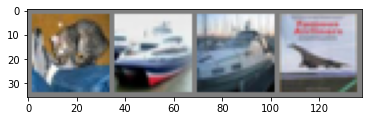

In [25]:
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [32]:
outputs = net(Variable(images))


In [33]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  plane plane plane plane


In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))